Instituto Federal de Ciência e Tecnologia de Goiás

# Atividade de Estatística aplicada
Aluno: Gustavo Oliveira de Melo

Curso: Inteligência artifical aplicada


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

dataset_tabela1 = pd.read_csv('tabela1.csv', delimiter=';')
dataset_tabela1


In [ ]:
#Quantitativo por sexo:
masculino = dataset_tabela1[dataset_tabela1['Sexo'] == 'M']
feminino = dataset_tabela1[dataset_tabela1['Sexo'] == 'F']

print(f'Total Masculino: {len(masculino)}\nTotal Feminino: {len(feminino)}')

Total Masculino: 12
Total Feminino: 36


# Análise 1)
Essa análise trata-se do quantitativo geral dos alunos em relação ao gênero. A utilização do gráfico no formato de pizza se dá por conta do pequeno número de variáveis a serem demonstradas (apenas 3: F, M e Ni).
Pela análise visual do gráfico, fica visível a maior quantidade de indivíduos do sexo Feminino próximo a 75% de representividade.


<Axes: ylabel='Sexo'>

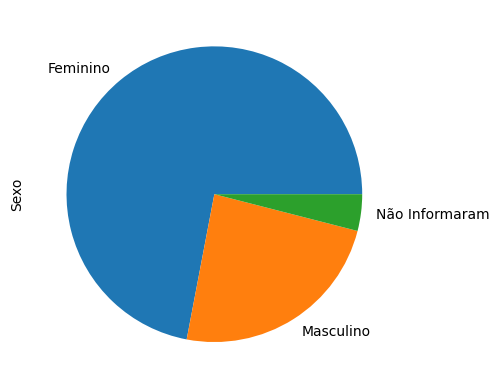

In [ ]:
dataset_tabela1['Sexo'].value_counts().plot(kind='pie',labels=['Feminino','Masculino','Não Informaram'])


# Análise 2)
Nessa análise, foram utilizados dois histogramas sobrepostos. Um com a frequência das idades dos alunos na turma A e outro na turma B.
A análise utilizando o histograma é interessante para podermos verificar as frequências das idades em cada turma. No exemplo é visível que, apesar de algumas diferenças, a frequência das idades fica a mesma entre as turmas A e B, tendo como pico a frequência da idade de 18 anos.

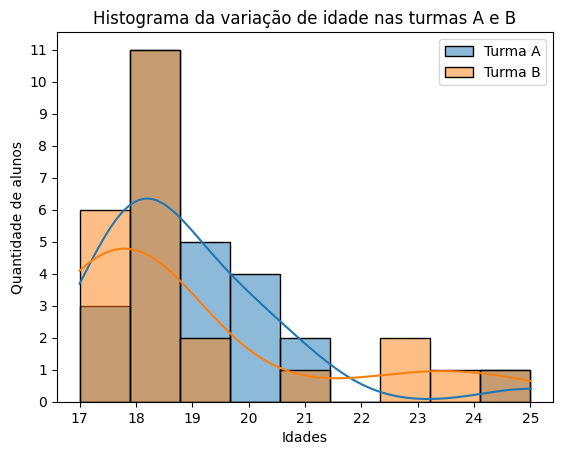

In [ ]:
#Histograma mostrando a variação da frequencia das idades em cada turma
sns.histplot(dataset_tabela1[dataset_tabela1['Turma'] == 'A']['Idade'], kde=True, label='Turma A', bins=9)
sns.histplot(dataset_tabela1[dataset_tabela1['Turma'] == 'B']['Idade'], kde=True, label='Turma B', bins=9)
plt.xlabel('Idades')
plt.ylabel('Quantidade de alunos')
plt.yticks(range(0, 12, 1))
plt.legend()
plt.title('Histograma da variação de idade nas turmas A e B')
plt.show()


# Análise 3)
A intenção aqui com os dados e o gráfico, é verificar a média de horas assistidas de TV em relação a opnião dos indivíduos sobre a programação da TV.
Com os dados e através do gráfico, é possível verificar quando a avaliação da programação é boa, a média de horas semanais de TV, dessas pessoas, é maior. Isso vai decrescendo a medida que a avaliação caminha para ruim, já em quem 'não sabe' assiste menos tv ainda.
No segundo gráfico, é analisado as horas do Cinema e não da TV. É observado que não mudou muito entre quem avaliou a programação do cinema como Boa e Regular ou Muito boa.

   Avaliação  Média de horas assistidas
0        Boa                      18.33
1      Media                      14.00
2       Ruim                      10.62
3  Não sabem                       8.00



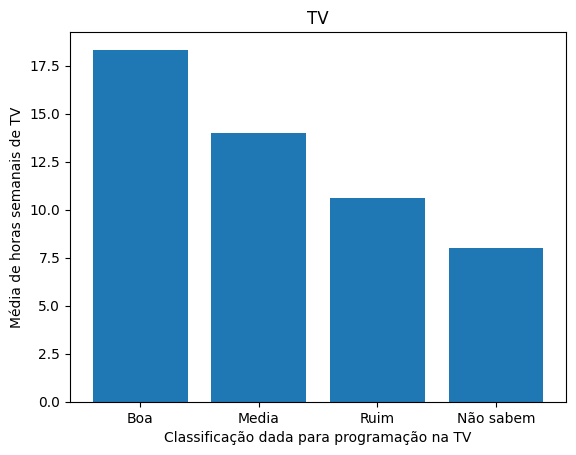

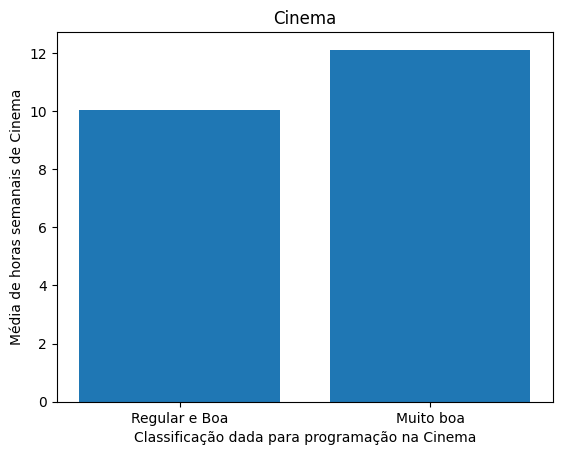

In [ ]:
dados_horas_TV = {
    'Avaliação': ['Boa', 'Media', 'Ruim', 'Não sabem'],
    'Média de horas assistidas':
     [round(dataset_tabela1[dataset_tabela1['OpTV'] == 'B']['TV'].mean(),2),
      round(dataset_tabela1[dataset_tabela1['OpTV'] == 'M']['TV'].mean(),2),
      round(dataset_tabela1[dataset_tabela1['OpTV'] == 'R']['TV'].mean(),2),
      round(dataset_tabela1[dataset_tabela1['OpTV'] == 'N']['TV'].mean(),2)]
}
df = pd.DataFrame(dados_horas_TV)
print(f'{df}\n')

plt.bar(df['Avaliação'],df['Média de horas assistidas'])
plt.title('TV')
plt.ylabel('Média de horas semanais de TV')
plt.xlabel('Classificação dada para programação na TV')
plt.show()

dados_horas_cinema = {
    'Avaliação': ['Regular e Boa', 'Muito boa'],
    'Média de horas assistidas':
     [round(dataset_tabela1[dataset_tabela1['OpCine'] == 'B']['TV'].mean(),2),
      round(dataset_tabela1[dataset_tabela1['OpCine'] == 'M']['TV'].mean(),2)]
}
df = pd.DataFrame(dados_horas_cinema)
df

plt.bar(df['Avaliação'],df['Média de horas assistidas'])
plt.title('Cinema')
plt.ylabel('Média de horas semanais de Cinema')
plt.xlabel('Classificação dada para programação na Cinema')
plt.show()

# Análise 4)

Para verificar a saúde em relação ao IMC de cada indivíduo foi utilizado um gráfico de pontos do tipo 'scatter'. Com ele é possível ver a plotagem de todos os indivíduos levando em consideração o peso e sua altura. Para a avaliação foi traçada uma linha de regressão linear para pesos com imc = 21 (considerando esse um peso ideal). É notável que existe um elemento que está muito acima do seu peso ideal.

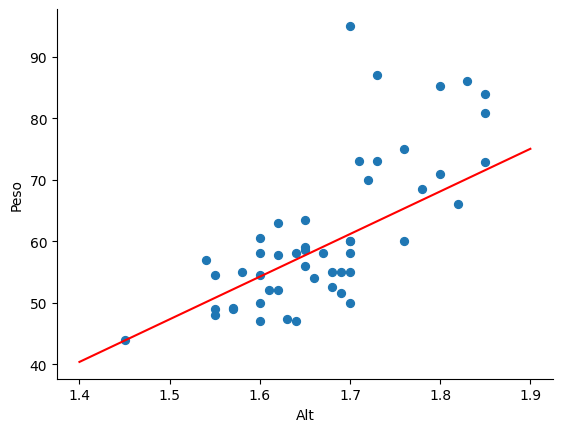

In [ ]:
alturas = (np.arange(1.4, 1.95, 0.05))
peso_ideal = []
imc = 21

for alt in alturas:
  peso_ideal.append(round(alt*alt*imc,2))

a, b, r, p, e = stats.linregress(altura, peso)

dataset_tabela1.plot(kind='scatter', x='Alt', y='Peso', s=32)
plt.plot(altura, a * np.array(altura) + b, color='r')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Análise 5)

Ao correlacionar a idade do aluno com a quantidade filhos, foi utilizado o gráfico do tipo 'box', não foi encontrada relação entre a idade e a quantidade de filhos, apenas uma pequena diferença entre a quantidade de filhos para alunos (que possuem filhos) maiores de 21 anos, esses possuem 2 ou mais filhos.
Outro dado que ficou visível, foi o indivíduo de 19 anos com 7 filhos, indicando um possível outlier.

Text(0, 0.5, 'Quantidate de Filhos')

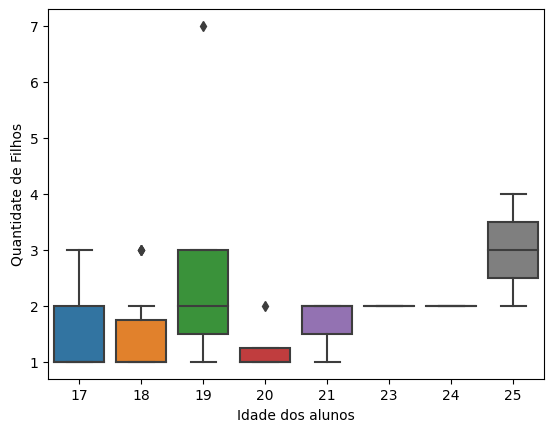

In [ ]:
sns.boxplot(x='Idade', y='Filhos', data=dataset_tabela1)
plt.xlabel('Idade dos alunos')
plt.ylabel('Quantidate de Filhos')